<h2 align=center> Facial Expression Recognition with Keras</h2>

In [21]:
!pip install livelossplot

### Task 1: Import Libraries

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import utils
import os
%matplotlib inline


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import zipfile

from IPython.display import SVG, Image

import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.18.0


# Task 2: Plot Sample Image

In [23]:
path = '/content/facialexpression.zip'

zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [24]:

for expression in os.listdir('train'):
    print(str(len(os.listdir('train/'+expression)))+" "+expression+" "+ "Images")

3995 angry Images
7215 happy Images
4097 fear Images
436 disgust Images
4965 neutral Images
4830 sad Images
3171 surprise Images


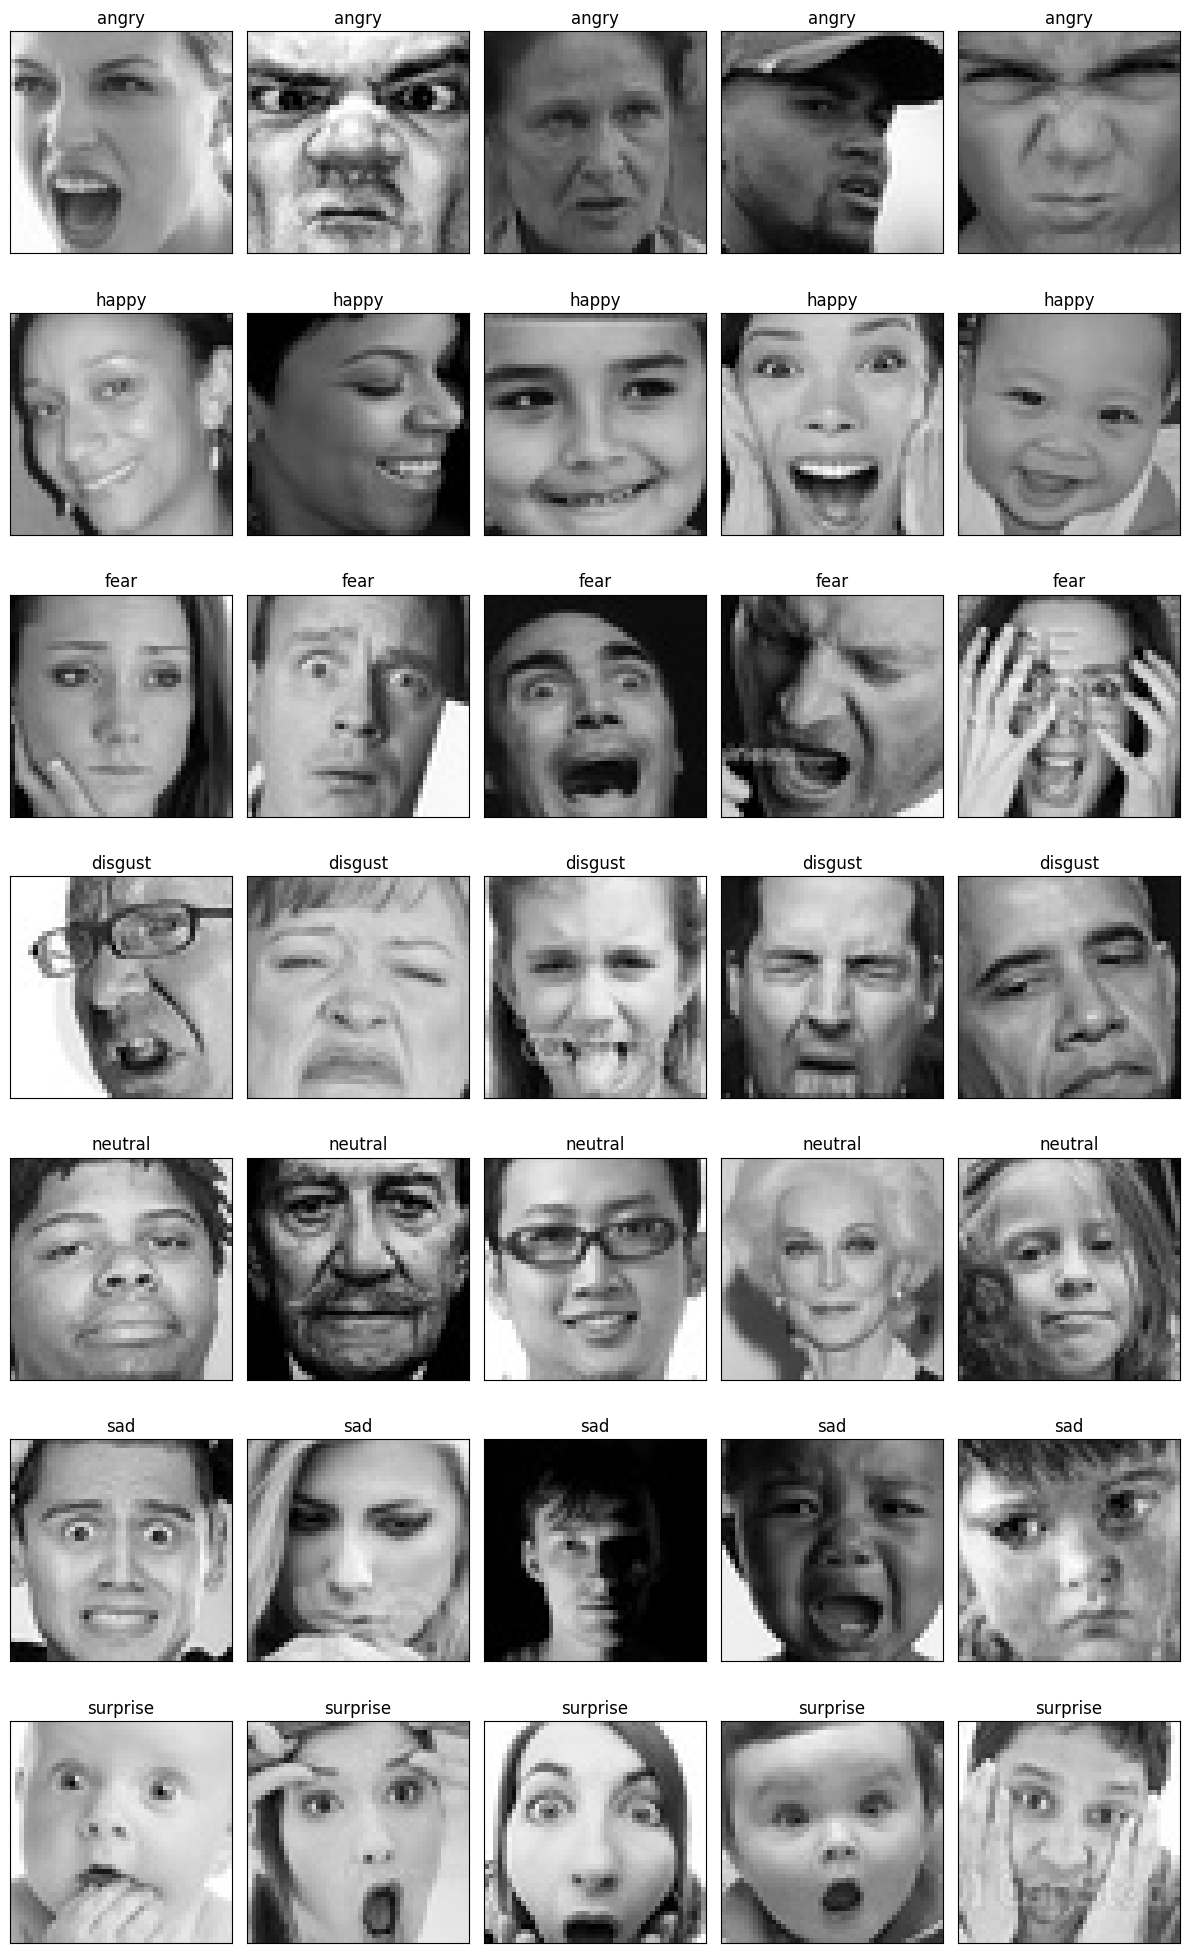

In [25]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#setting the dimensions of images
img_size = 48

plt.figure(0, figsize=(12,20))
ctr = 0
for expression in os.listdir("train/"):
    for i in range(1,6):
        ctr += 1
        plt.subplot(7,5,ctr)

        img = load_img("train/" + expression + "/" +os.listdir("train/" + expression)[i], target_size=(img_size, img_size))
        plt.xticks([])
        plt.yticks([])
        # displaying the title
        plt.title(expression)
        plt.imshow(img, cmap="gray")

plt.tight_layout()


### Task 3: Generate Training and Validation Batches

In [26]:
img_size=48
batch_size=64
# to improve do data augmentation
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("train/",
                                                 target_size=(img_size,img_size),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("test/",
                                                 target_size=(img_size,img_size),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Task 4: Create CNN Model

![](model.png)
Inspired by Goodfellow, I.J., et.al. (2013). Challenged in representation learning: A report of three machine learning contests. *Neural Networks*, 64, 59-63. [doi:10.1016/j.neunet.2014.09.005](https://arxiv.org/pdf/1307.0414.pdf)

In [ ]:
model=Sequential()

#conv-1
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2 -conv layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



#3 -conv layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



#4 -conv layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7,activation='softmax'))

opt=Adam(learning_rate=0.0005)


model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

### Task 6: Train and Evaluate Model

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

ephocs=15

checkpoint=ModelCheckpoint("model_weight.weights.keras")

callbacks= [checkpoint]
history=model.fit(
    x=train_generator,
    epochs=ephocs,
    validation_data=validation_generator,
    callbacks=callbacks
)
model.save('my_expression.keras')

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2704 - loss: 1.9305

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.2705 - loss: 1.9301 - val_accuracy: 0.3670 - val_loss: 1.6760
Epoch 2/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.4099 - loss: 1.5306 - val_accuracy: 0.3947 - val_loss: 1.5858
Epoch 3/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.4850 - loss: 1.3401 - val_accuracy: 0.5110 - val_loss: 1.2504
Epoch 4/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5207 - loss: 1.2484 - val_accuracy: 0.5332 - val_loss: 1.2242
Epoch 5/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.5437 - loss: 1.1990 - val_accuracy: 0.5391 - val_loss: 1.1907
Epoch 6/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.5602 - loss: 1.1505 - val_accuracy: 0.5598 - val_loss: 1.1523
Epoch 7/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5775 - loss: 1.1106 - val_accuracy: 0.5783 - val_loss: 1.1114
Epoch 8/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5913 - loss: 1.0801 - val_accurac

In [ ]:
model.save('/my_expression.keras')


In [ ]:
model_json=model.to_json()
with open("/model.json","w") as json_file:
    json_file.write(model_json)

### Task 7: Represent Model as JSON String

In [31]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

In [ ]:
from tensorflow.keras.models import load_model
classifier=load_model('/my_expression.keras')

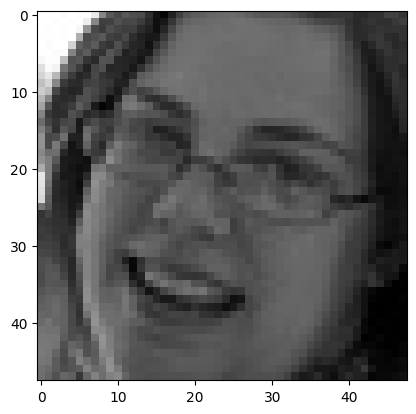

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image=image.load_img('/train/happy/Training_10019449.jpg')

#test_image=image.load_img('/content/train/sad/Training_120178.jpg')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
plt.imshow(test_image)

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image=image.load_img('/content/train/happy/Training_10019449.jpg',
                          target_size=(48,48,1),color_mode="grayscale")

#test_image=image.load_img('/content/train/sad/Training_120178.jpg',
 #                         target_size=(48,48,1),color_mode="grayscale")
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
print(train_generator.class_indices)
print(result)
a=result.argmax()
s=train_generator.class_indices

name=[]
for i in s:
    name.append(i)
for i in range(len(s)):
    if(i==a):
        q=name[i]

print(q)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
[[0.0095437  0.0009183  0.03444235 0.87445307 0.00132997 0.01554884
  0.06376381]]
happy


### Live Camera in Jupyter Notebook

In [35]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2


def predictor(test_img):
    #test_img=image.load_img(path,target_size=(48,48))
    test_img=image.img_to_array(test_img)
    test_img=np.expand_dims(test_img,axis=0)
    result=classifier.predict(test_img)
    a=result.argmax()
    s=train_generator.class_indices
        #print(s)
    name=[]
    for i in s:
        name.append(i)
    for i in range(len(s)):
        if(i==a):
            q=name[i]
    return q

# Modified to use the take_photo function from the Colab camera API
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import time

def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  #code starts from here
  img=js_to_image(data)
  return img

# Load the cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# This loop will continuously capture images from the Colab camera
# and perform face detection and emotion prediction.
# Press the 'Capture' button in the output to capture a frame.
while True:
    frame = take_photo() # Capture a frame using the Colab camera API
    if frame is None:
        continue # Skip processing if no frame is captured


    # Using the preloaded cascade classifier
    haar_face_cascade = face_cascade
    g_frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces=haar_face_cascade.detectMultiScale(frame,scaleFactor=1.06,minNeighbors=5)
    print("faces found")
    #print(faces)
    for(x,y,w,h) in faces:

        crop=g_frame[y:y+h,x:x+w]
        roi=cv2.resize(crop,(48,48))
        path='s.jpg'
        cv2.imwrite(path,roi)
        name=predictor(roi)
        print(name)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(frame,name,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(255, 0, 0),2)



<IPython.core.display.Javascript object>

faces found
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
sad


<IPython.core.display.Javascript object>

faces found
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
happy


<IPython.core.display.Javascript object>

faces found
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
sad


<IPython.core.display.Javascript object>

faces found
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
sad


<IPython.core.display.Javascript object>

KeyboardInterrupt: 